<a href="https://colab.research.google.com/github/bamacgabhann/PTSA/blob/main/PTSA.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PTSA - Public Transit Service Areas - is a Python package to generate service area polygons around public transit locations (e.g. bus stops, train stations) using several different methods.

This Notebook uses PTSA to generate service areas for bus stops in Limerick and Sligo (Ireland), using several different methods, and evaluate the results.

If you are using Google Colab to run this Notebook, you can run the following cell to connect a Google Drive.

In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

If you are using Google Colab to run this Notebook, you will need to run the following cell to install missing packages:

In [ ]:
if 'google.colab' in str(get_ipython()):
    !pip install osmnx
#    !pip install movingpandas hvplot cartopy geoviews

Import dependencies

In [1]:
import geopandas as gpd
import osmnx as ox

import matplotlib.pyplot as plt

#from shapely.geometry import Point, LineString, Polygon, box

#import pandas as pd
#import movingpandas as mpd


#import hvplot.pandas

#from datetime import datetime, timedelta
#from holoviews import opts

#import warnings
#warnings.filterwarnings("ignore")

#plot_defaults = {"linewidth": 5, "capstyle": "round", "figsize": (10, 6), "legend": True}

Import GeoPackage files defining the area of interest, and the public transit points

In [3]:
area = gpd.read_file('https://github.com/bamacgabhann/PTSA/raw/refs/heads/main/sample_data/sligo_area.gpkg', layer='sligo_area')
area_10m_buffer = gpd.read_file('https://github.com/bamacgabhann/PTSA/raw/refs/heads/main/sample_data/sligo_area.gpkg', layer='sligo_area_10m_buffer')
service_points = gpd.read_file('https://github.com/bamacgabhann/PTSA/raw/refs/heads/main/sample_data/sligo_bus_stops.gpkg')

Use OSMNX to import roads and footways from Open Street Map for the area of interest:

In [4]:
# Extract a polygon from the geopackage, converting to EPSG:4326 for Open Street Map download
area_polygon = area_10m_buffer.to_crs(4326).geometry[0]

# download the national, secondary, and local roads from OpenStreetMap in the area, converting to EPSG:2157 because a projected CRS is required to generate network, cropping them to the map area
area_roads = ox.features_from_polygon(area_polygon, tags={'highway': ['trunk','trunk_link','primary','primary_link','secondary','secondary_link','tertiary','unclassified','residential','service', 'tertiary_link','pedestrian','footway', 'track', 'path', 'steps']})
area_roads = area_roads[area_roads.geom_type == 'LineString'].to_crs(2157).overlay(area_10m_buffer, how='intersection')

N_list = ['trunk','trunk_link','primary','primary_link']
R_list = ['secondary','secondary_link']
L_list = ['tertiary','unclassified','residential','service', 'tertiary_link']
P_list = ['pedestrian','footway' 'track', 'path', 'steps']

N_roads = area_roads[area_roads['highway'].isin(N_list)]
R_roads = area_roads[area_roads['highway'].isin(R_list)]
L_roads = area_roads[area_roads['highway'].isin(L_list)]
P_roads = area_roads[area_roads['highway'].isin(P_list)]

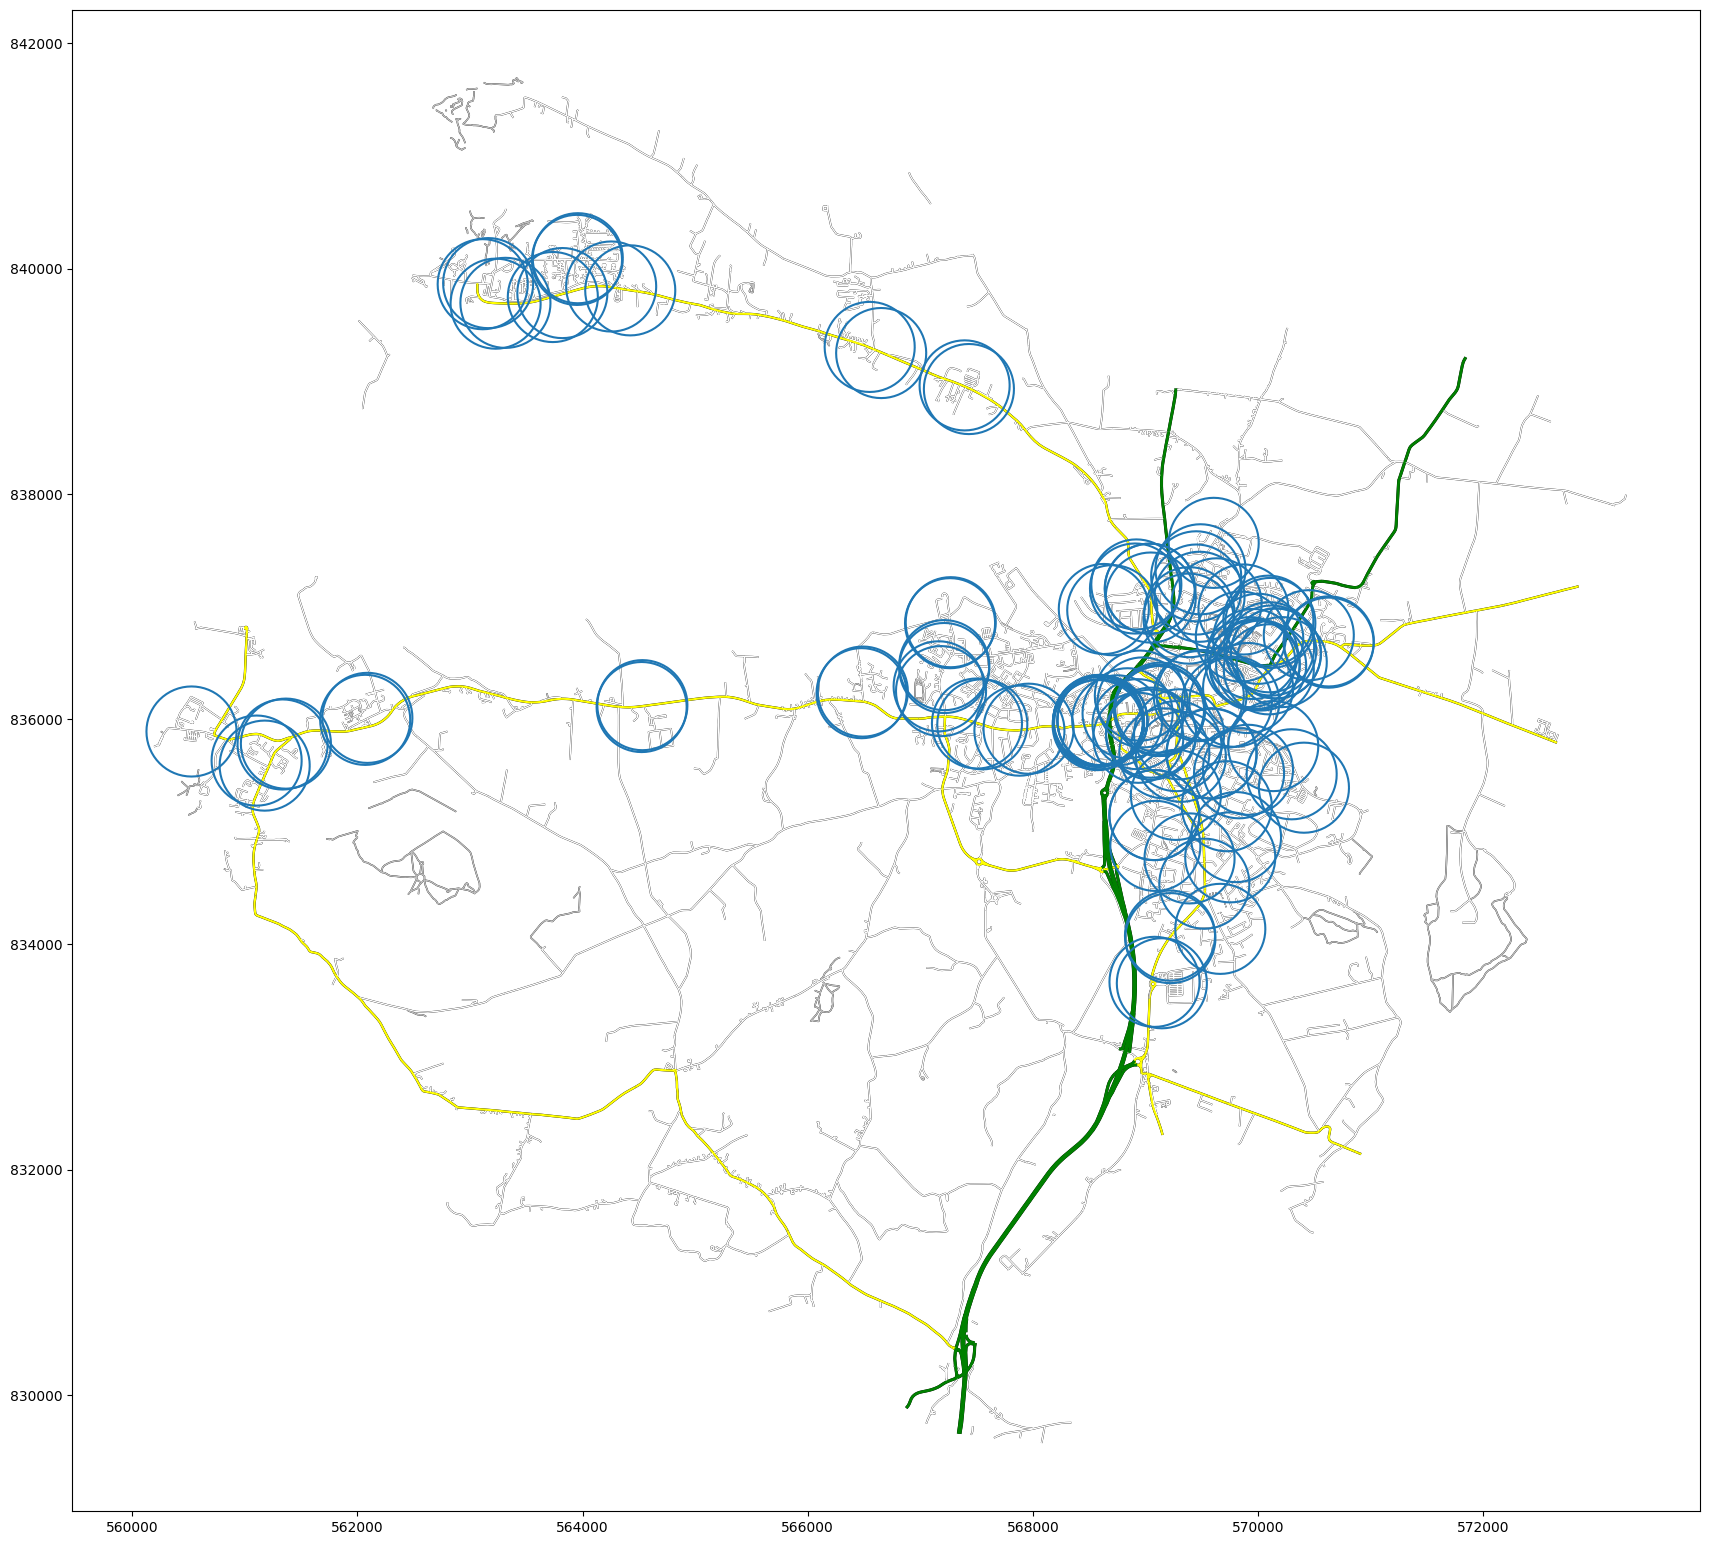

In [22]:
# plot
fig, ax = plt.subplots(figsize=(21, 21))

# plot all roads with a thicker black line which will show as edges,
# and a main line coloured by category
L_roads.plot(ax=ax, color='black', linewidth=1.2)
R_roads.plot(ax=ax, color='black', linewidth=1.7)
N_roads.plot(ax=ax, color='black', linewidth=2.2)
P_roads.plot(ax=ax, color='black', linewidth=1.1)
L_roads.plot(ax=ax, color='white', linewidth=1)
R_roads.plot(ax=ax, color='yellow', linewidth=1.5)
N_roads.plot(ax=ax, color='green', linewidth=2)
P_roads.plot(ax=ax, color='silver', linewidth=1)

sligo_circles.boundary.plot(ax=ax)

plt.show()

**Creating Service Areas**

blah

metric


In [19]:
import warnings
import geopandas as gpd

class CRSWarning(UserWarning, ValueError):
    pass

class distanceWarning(UserWarning, ValueError):
    pass

class unitsWarning(UserWarning, ValueError):
    pass

class Transit_System:
    def __init__(
        self,
        network,
        service_points,
        crs=None,
        service_distance=None,
    ):
        """
        
        """  

        if not isinstance(network, gpd.GeoDataFrame):
            raise ValueError(
                "The input network must be a GeoDataFrame"
            )

        if not isinstance(service_points, gpd.GeoDataFrame):
            raise ValueError(
                "The input service points must be a GeoDataFrame"
            )
        
        

        if crs is not None:
            self.crs = crs

        else:
            if network.crs.is_geographic == True:
                
                if service_points.crs.is_geographic == True:
                    raise ValueError(
                        "Service area generation requires a projected CRS."
                        "Please declare or convert network and service points"
                        "to a projected CRS."
                        )
                else:
                    self.crs = service_points.crs
                    warnings.warn(
                        "Using service points CRS",
                        category=CRSWarning,
                    )

            else:
                self.crs = network.crs
                warnings.warn(
                    "Using network CRS",
                    category=CRSWarning,
                )

        self.network = network[~network.index.duplicated(keep="first")].to_crs(self.crs)


        res = pd.concat([gdf1, gdf2])
        
        self.service_points = service_points[~service_points.index.duplicated(keep="first")].to_crs(self.crs)
        self.crs_units = self.crs.axis_info[0].unit_name
        if service_distance is None:
            self.service_distance = 400        
            if self.crs_units != 'metre':
                warnings.warn(
                    "CRS is non-metric but service area generation uses metric."
                    "Please convert transit system to a metric CRS or declare"
                    "a non-metric service distance",
                    category=unitsWarning,
                )




    def to_crs(self, new_crs):
        """
        Returns the transit system reprojected to the target CRS.

        Parameters
        ----------
        crs : pyproj.CRS
            Target coordinate reference system

        Returns
        -------
        Transit system

        Examples
        --------
        Reproject a transit system to EPSG:4088

        >>> from pyproj import CRS
        >>> reprojected = trajectory.to_crs(CRS(4088))
        """
        copied = Transit_system(network=self.network, service_points=self.service_points, new_crs=crs)
        return copied

    def circle_service_areas(self, points=None, distance=None):
        if points is None:
            points = self.service_points
        if distance is None:
            distance = self.service_distance
        return points.buffer(distance)
    

In [20]:
sligo = Transit_System(area_roads, service_points)
sligo

/tmp/ipykernel_8489/1044156718.py:58: CRSWarning: Using network CRS
  warnings.warn(


In [21]:
sligo_circles = sligo.circle_service_areas()

In [46]:
closest_roads = gpd.sjoin_nearest(service_points, area_roads, how='inner', max_distance=50).merge(area_roads, left_on="index_right", right_index=True)
#closest_roads.geometry_y
lines_to_stops = closest_roads['geometry_x'].shortest_line(closest_roads['geometry_y'])
lines_to_stops.to_file("lines_to_stops.gpkg")

In [24]:
service_points

,PtStopId,AtcoCode,PlateCode,SCN_English,SCN_Gaeilge,StopType,TransportMode,Bearing,NptgLocalityRef,PtBayCount,...,URBAN_AREA_CODE,URBAN_AREA_NAME,COUNTY,S1 to Cairns Road,S1 to Cartron,S2 to Rosses Point,S2 to Strandhill,S3 to Markievicz Road,S3 to Finisklin,geometry
0,11233.0,851000001,0.0,Sligo Markievicz,Sligeach Markievicz,MKD,Bus,U,E0851011,0.0,...,31143,Sligo,Sligo,NaN,NaN,NaN,NaN,NaN,NaN,MULTIPOINT (569129.905 836101.697)
1,11234.0,8510B524871,524871.0,Ash Lane,Lána na Fuinseoige,CUS,Bus,NW,E0851011,0.0,...,31143,Sligo,Sligo,NaN,NaN,NaN,NaN,NaN,NaN,MULTIPOINT (569967.019 836476.999)
2,11251.0,8510B6313901,631391.0,Abbey St,Sr na Mainistreach,MKD,Bus,E,E0851011,1.0,...,31143,Sligo,Sligo,1.0,NaN,NaN,NaN,NaN,NaN,MULTIPOINT (569297.028 835864.969)
3,11257.0,8510B557681,557681.0,Teeling Street,Sráid Thaoiling,MKD,Bus,S,E0851011,1.0,...,31143,Sligo,Sligo,NaN,NaN,NaN,NaN,NaN,NaN,MULTIPOINT (569313.088 835665.312)
4,11278.0,8510B5587001,558701.0,Sligo Garda Station,None,MKD,Bus,N,E0851011,0.0,...,31143,Sligo,Sligo,NaN,NaN,NaN,NaN,NaN,NaN,MULTIPOINT (569273.983 835759.951)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,NaN,8510B5587301,558731.0,Oyster Island,None,None,Bus,None,None,NaN,...,None,None,None,0.0,0.0,0.0,1.0,0.0,0.0,MULTIPOINT (563315.634 839696.23)
117,NaN,8510B5584501,558451.0,Rosses Point Promenade,None,None,Bus,None,None,NaN,...,None,None,None,0.0,0.0,0.0,1.0,0.0,0.0,MULTIPOINT (563821.044 839783.007)
118,NaN,8510B5584301,558431.0,Wine Street,None,Bus,None,None,None,NaN,...,None,None,None,0.0,0.0,1.0,0.0,0.0,0.0,MULTIPOINT (568839.93 836051.908)
119,NaN,8510B5584601,558461.0,Rosses Point Promenade,None,None,Bus,None,None,NaN,...,None,None,None,0.0,0.0,1.0,0.0,0.0,0.0,MULTIPOINT (563736.481 839747.894)
